In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
regression_dataset = pd.read_csv(data_path, delimiter = ',')
regression_dataset.head(5)

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [3]:
regression_dataset.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [4]:
regression_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revision_time  50 non-null     float64
 1   exam_score     50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [5]:
model_x = regression_dataset['revision_time']
model_y = regression_dataset['exam_score']

# x_train, x_test, y_train, y_test = train_test_split(model_x, model_y, train_size=0.75, test_size=0.25, random_state=0)

x_train = np.array([[1,x] for x in model_x])
# x_test = np.array([[1,x] for x in x_test])

y_train = np.array(model_y)

In [6]:
lm = LinearRegression(fit_intercept=False)
lm.fit(x_train, y_train)
print('Training accuracy: {:.3f}'.format(lm.score(x_train, y_train)))

Training accuracy: 0.928


In [7]:
# print('Testing accuracy by using score function: {:.3f}'.format(lm.score(x_test, y_test)))
# print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, lm.predict(x_test))))

In [8]:
lm.coef_

array([17.89768026,  1.44114091])

In [9]:
prediction_y = lm.predict(np.array([[1,x] for x in model_x]))

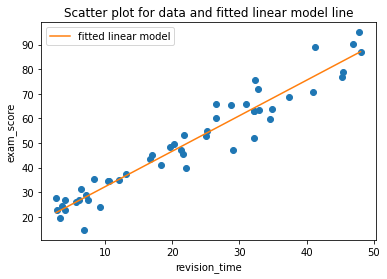

In [10]:
fig, ax = plt.subplots()
ax.scatter(model_x, model_y)
ax.plot([model_x.min(),model_x.max()], [prediction_y.min(), prediction_y.max()], color='tab:orange', label='fitted linear model')
ax.legend()
plt.title('Scatter plot for data and fitted linear model line')
ax.set_xlabel('revision_time')
ax.set_ylabel('exam_score')
fig.savefig('fitted_linear_model.jpg')


In [13]:
pseudo_inverse = np.linalg.inv(np.dot(x_train.T,x_train)),
pseudo_inverse = np.dot(pseudo_inverse, x_train.T)
phi_w = np.dot(pseudo_inverse, y_train)
phi_w

array([[17.89768026,  1.44114091]])

In [41]:
def close_form_prediction(phi_w, x):
    return np.dot(x, phi_w.reshape((2,1)))

def calculate_std(prediction_y, true_y):
    diff = prediction_y - true_y
    diff = diff ** 2
    sum_of_diff = np.sum(diff)
    return np.sqrt(sum_of_diff / len(prediction_y))

In [50]:
prediction_y_close_form = close_form_prediction(phi_w,x_train)
prediction_y_close_form = prediction_y_close_form.reshape((50))

In [27]:
lm.predict(x_train)

array([21.82190694, 21.99628499, 22.65776867, 23.06849383, 23.73430093,
       23.77753515, 26.07471376, 26.63099415, 27.04460159, 27.72482009,
       28.12689841, 28.72785416, 29.93985366, 31.17635256, 32.8336646 ,
       33.04407117, 35.3383675 , 36.90200538, 41.95320425, 42.36392941,
       44.31379306, 46.14260086, 47.1831046 , 48.56515873, 48.99461872,
       49.31166972, 49.67195494, 53.85270471, 54.13805061, 56.08070855,
       56.13835418, 59.23968941, 59.77002927, 62.63501739, 64.26783003,
       64.30674084, 64.33988708, 64.400415  , 65.03884042, 65.29104007,
       67.60118895, 68.17764531, 71.65079489, 76.80431477, 77.34330147,
       83.05598402, 83.32115394, 85.52033496, 86.81015607, 87.08829627])

In [51]:
calculate_std(prediction_y_close_form, y_train)

5.5664596122258265

In [52]:
calculate_std(lm.predict(x_train), y_train)

5.566459612225826